<h1>Example</h1><br>
<h5>We want to construct a box whose base length is 3 times the base width.</h5><br>
<h5>The material used to build the top and bottom cost 10/ft<sup>2</sup> and the material used to build the sides cost 6/ft<sup>2</sup>.</h5><br>
<h5>If the box must have a volume of 50ft<sup>3</sup> determine the dimensions that will minimize the cost to build the box.</h5><br>
![替代文字](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image003.png)

<h5>We want to minimize the cost of the materials subject to the constraint that the volume must be 50ft<sup>3</sup>.<br> Note as well that the cost for each side is just the area of that side times the appropriate cost.</h5><br>
<h4>The two functions we’ll be working with here this time are:</h4><br>
$$Minimize : C = 10(2lw)+6(2wh+2lh) = 60w^2 + 48wh$$
$$Constraint : 50 = lwh = 3w^2h$$


<h5>As with the first example, we will solve the constraint for one of the variables and plug this into the cost.</h5><br>
$$h = \frac{50}{3w^2}$$
<h5>Plugging this into the cost gives,</h5><br>
$$C(w) = 60w^2+48w(\frac{50}{3w^2})=60w^2+\frac{800}{w}$$<br>
$$C'(w) = 120w-800w^{-2}=\frac{120w^3-800}{w^2}$$<br>
$$C''(w) = 120+1600w^{-3}$$<br>
$$120w^3-800=0 \Rightarrow w = \sqrt[3]{\frac{800}{120}} = \sqrt[3]{\frac{20}{3}} = 1.8821$$
<h5>All we need to do now is to find the remaining dimensions </h5><br>
$$w = 1.8821$$<br>
$$l = 3w = 3(1.8821) = 5.6463$$<br>
$$h = \frac{50}{3w^2} = \frac{50}{3(1.8821)^2} = 4.7050$$<br>
$$C(1.8821) = $637.60$$

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy
from sympy import*
from scipy.optimize import fmin


C:\Users\M217\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def my_function(w):
    return 60*w**2+800/w

In [5]:
def my_function_h(w):
     return 50/(3*(w**2))

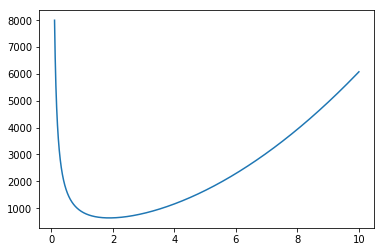

In [7]:
x = np.arange(0.1,10,0.0001)
y = my_function(x)
plt.plot(x,y)

<h5>Useing scipy.optimize.fmin find Minimum </h5>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html


Optimization terminated successfully.
         Current function value: 637.595142
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 637.595142
         Iterations: 16
         Function evaluations: 32


C:\Users\M217\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


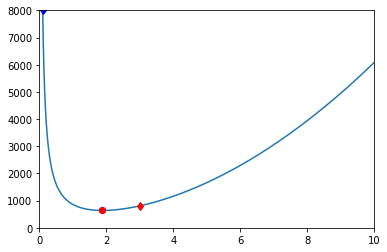

In [8]:
#objective function
rsinc = lambda x: 60*x**2+800/x
# start from x = 0.1 從0.1開始找極值
x0 = 0.1
xmin0 = fmin(rsinc,x0)

# start from x = 3 從3開始找極值
x1 = 3
xmin1 = fmin(rsinc,x1)

#劃出函數,並劃出極值與起始點
x = numpy.linspace(0,10,10000)
y = rsinc(x)
pylab.plot(x,y)

pylab.plot(x0,rsinc(x0),'bd',xmin0,rsinc(xmin0),'bo')

pylab.plot(x1,rsinc(x1),'rd',xmin1,rsinc(xmin1),'ro')
pylab.axis([0,10,0,8000])
pylab.show()


In [10]:
w = xmin1[0]
l = 3*w
h = my_function_h(w)
C = 60*w**2+48*w*h
print('w = ',w,'\nl = ',l,'\nh = ',h,'\nC = ',C)


w =  1.8821044921874972 
l =  5.646313476562492 
h =  4.705017976470001 
C =  637.595141698923


<h5>Golden-section search<br><br>
The golden-section search is a technique for finding the extremum (minimum or maximum) of a strictly unimodal function by successively narrowing the range of values inside which the extremum is known to exist.

$$ φ =  (1+√5)/2  = 1.618033.988 $$


In [13]:
import math
#黃金比例
gr = (math.sqrt(5) + 1) / 2

#Function黃金分割,f = function , a = 起始範圍 , b = 結束範圍 , tol = 精度 (1e-5表示誤差在10的-5次方內停止)
def Golden_section(f, a, b, tol=1e-5):
    count = 0
    c = b - (b - a) / gr
    d = a + (b - a) / gr 
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    return (b + a) / 2

In [14]:
#定義函式
f = lambda x: 60*x**2+800/x
w_GS = Golden_section(f,0,100)

In [25]:
#印出值
l_GS = 3*w
h_GS = my_function_h(w)
C_GS = 60*w_GS**2+48*w_GS*h_GS
print('w_GS = ',w_GS,'\nl_GS = ',l_GS,'\nh_GS = ',h_GS,'\nC_GS = ',C_GS)


w_GS =  1.882082283713237 
l_GS =  5.646313476562492 
h_GS =  4.705017976470001 
C_GS =  637.5851103072256


<h3>Newton's method<br><br>
is a method for finding successively better approximations to the roots (or zeroes) of a real-valued function. It is one example of a root-finding algorithm<br><br><br>
Solving the most value problem:<br><br>
The Newton method is also used to find the extreme value of a function. Since the derivative value at the point where the function takes the extreme value is zero, the zero point of the derivative function can be obtained by the Newton method. The iterative formula is:<br>
$$x_{n+1} = x_{n} - {\frac{f'(x_{n})}{f''(x_{n})}}$$

In [17]:
#求解方程 60w^2+800/w
#微分 60w^2+800/w 求一皆導數
def df(x):  
    return 120*x-800/x**2
  
#二皆微分 60w^2+800/w 求二皆導數 
def df2(x):  
    return 120 + 1600/x**3

In [18]:
# 算出 Xn 值
def Xn(x):  
    return x - df(x) / df2(x)  

#Xn+11與Xn差值 
def E(xn, x):  
    return abs(xn - x)  

In [19]:
def Newton(x,e):
    i = 0
    xn = Xn(x)
    count = 0
    while E(xn, x) > e:  
        i = i + 1
        count = count + 1
        x = xn  
        xn = Xn(x)    
    return x 

In [22]:
w_NT = Newton(10,0.000000001)

In [24]:
l_NT = 3*w_NT
h_NT = my_function_h(w_NT)
C_NT = 60*w_NT**2+48*w_NT*h_NT
print('w_NT = ',w_NT,'\nl_NT = ',l_NT,'\nh_NT = ',h_NT,'\nC_NT = ',C_NT)

w_NT =  1.8820720577620569 
l_NT =  5.64621617328617 
h_NT =  4.705180144405143 
C_NT =  637.5951415095666
